In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

### Importing images

In [80]:
img_1 = mpimg.imread("5.1.12.tiff")
img_2 = mpimg.imread("5.3.01.tiff")
img_3 = mpimg.imread("5.1.09.tiff")

# 2D-DFT
## Question 1
### Iterative implementation

In [3]:
def dft_1(I):
    (M, N) = I.shape
    W_M = np.exp(-1*1j*2*np.pi/M)
    W_N = np.exp(-1*1j*2*np.pi/N)
    It = np.zeros((M, N))
    
    for u in range(M):
        for v in range(N):
            for i in range(M):
                for j in range(N):
                    It[u, v] = I[i, j]*np.power(W_M, i)*np.power(W_N, j)
    
    return It

def idft_1(It):
    (M, N) = It.shape
    W_M = np.exp(-1*1j*2*np.pi/M)
    W_N = np.exp(-1*1j*2*np.pi/N)
    I = np.zeros((M, N))
    
    for u in range(M):
        for v in range(N):
            for i in range(M):
                for j in range(N):
                    I[u, v] = It[i, j]*np.power(W_M, -1*i)*np.power(W_N, -1*j)
    
    return (1/(M*N))*I

def plot_DFT(It, log=False, onlyMag=False):
    mag = np.absolute(It)
    phase = np.angle(It)
    
    plt.figure()
    
    if onlyMag:
        if log:
            plt.title("Logarithmic Magnitude")
            plt.imshow(np.log(1 + mag), cmap='gray')
        else:
            plt.title("Magnitude")
            plt.imshow(mag, cmap='gray')
    else:
        plt.subplot(1, 2, 1)
        if log:
            plt.title("Logarithmic Magnitude")
            plt.imshow(np.log(1 + mag), cmap='gray')
        else:
            plt.title("Magnitude")
            plt.imshow(mag, cmap='gray')

        plt.subplot(1, 2, 2)
        plt.title("Phase")
        plt.imshow(phase, cmap='gray')

### DFT on image
Iterative implementation is very computaion expensive as it complexity is O($n^4$), so images given in homework are not computationally feasible in my workstation. Below two cells utilizes image which is 64x64 and which is rendered customly.

In [ ]:
 # Customized image of size 64X64
img_4 = mpimg.imread("custom.tiff")[:, :, 0]

In [ ]:
%%time
plt.figure()
plt.title("Original image")
plt.imshow(img_4, cmap='gray')

I_dft_4 = dft_1(img_4)
plot_DFT(I_dft_4)

<ipython-input-3-8406285220a4>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  It[u, v] = I[i, j]*np.power(W_M, i)*np.power(W_N, j)


### IDFT to obtain image

In [ ]:
%%time
I_4 = idft_1(I_dft_4)
plt.imshow(I_4, cmap='gray')

### Matrix implementation

In [4]:
def dft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * np.pi * 1j / N )
    W = np.power( omega, i * j )
    return W

def idft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(2 * np.pi * 1j / N )
    W = np.power( omega, i * j ) / N
    return W

def dft_2(I):
    (M, N) = I.shape
    
    W_N = dft_matrix(N)
    W_M = dft_matrix(M)
    
    It = np.zeros((M, N), dtype=np.complex)
    It = W_M@I@W_N
    return It

def idft_2(It):
    (M, N) = It.shape
    W_N = idft_matrix(N)
    W_M = idft_matrix(M)
    
    I = np.zeros((M, N), dtype=int)
    I = np.clip(np.real(W_M@It@W_N), 0, 255)
    return I

### DFT on image

<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


CPU times: user 261 ms, sys: 199 ms, total: 460 ms
Wall time: 99.2 ms


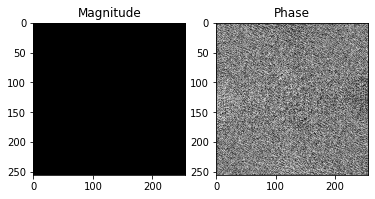

In [5]:
%%time
I_dft_1 = dft_2(img_1)
plot_DFT(I_dft_1)

### IDFT to obtain image

CPU times: user 190 ms, sys: 153 ms, total: 344 ms
Wall time: 85.2 ms


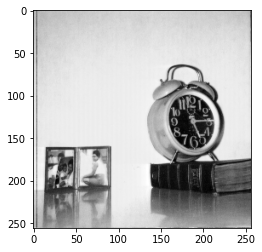

In [6]:
%%time
I_1 = idft_2(I_dft_1)
plt.imshow(I_1, cmap='gray')

#### Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.

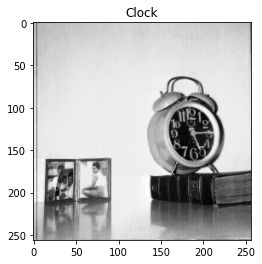

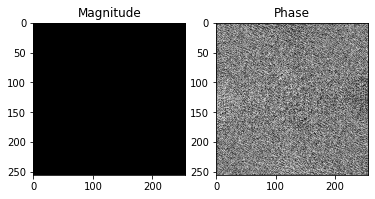

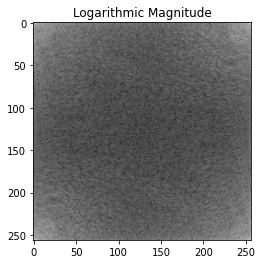

In [7]:
plt.figure()
plt.title("Clock")
plt.imshow(img_1, cmap='gray')

plot_DFT(I_dft_1)

plot_DFT(I_dft_1, log=True, onlyMag=True)

<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


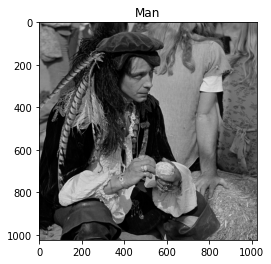

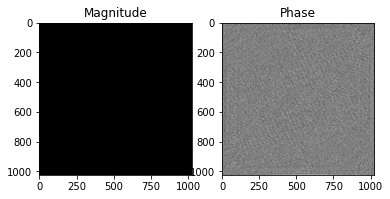

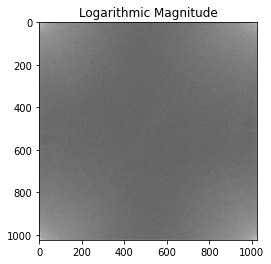

In [8]:
I_dft_2 = dft_2(img_2)

plt.figure()
plt.title("Man")
plt.imshow(img_2, cmap='gray')

plot_DFT(I_dft_2)

plot_DFT(I_dft_2, log=True, onlyMag=True)

<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


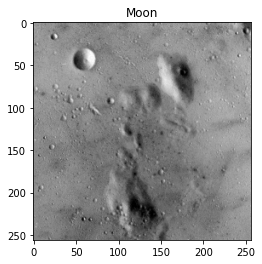

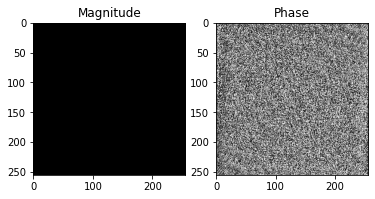

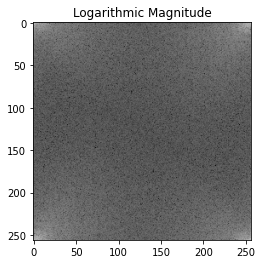

In [9]:
I_dft_3 = dft_2(img_3)

plt.figure()
plt.title("Moon")
plt.imshow(img_3, cmap='gray')

plot_DFT(I_dft_3)

plot_DFT(I_dft_3, log=True, onlyMag=True)

### Centered DFT

In [10]:
def centered_dft(I):
    (M, N) = I.shape
    i, j = np.meshgrid(np.arange(M), np.arange(N))
    scale_mat = np.power(-1, i + j)
    
    return dft_2(scale_mat*I)

<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


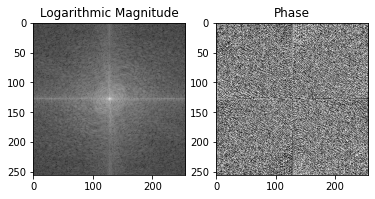

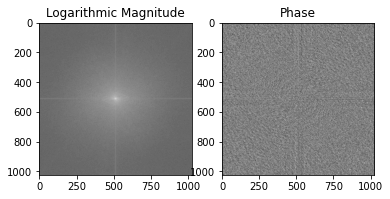

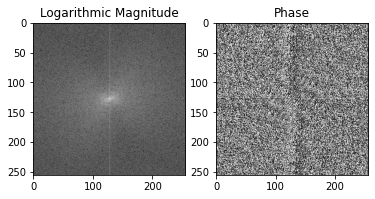

In [11]:
c_I_dft_1 = centered_dft(img_1)
plot_DFT(c_I_dft_1, log=True)

c_I_dft_2 = centered_dft(img_2)
plot_DFT(c_I_dft_2, log=True)

c_I_dft_3 = centered_dft(img_3)
plot_DFT(c_I_dft_3, log=True)

### IDFT[DFT[I]] = I

In [12]:
I_1 = idft_2(dft_2(img_1))
I_2 = idft_2(dft_2(img_2))
I_3 = idft_2(dft_2(img_3))

<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


In [13]:
if np.allclose(I_1, img_1):
    print("IDFT[DFT[I]] == I is verified for clock image!!")
else:
    print("IDFT[DFT[I]] == I is not verified for clock image!!")

if np.allclose(I_2, img_2):
    print("IDFT[DFT[I]] == I is verified for man image!!")
else:
    print("IDFT[DFT[I]] == I is not verified for man image!!")

if np.allclose(I_3, img_3):
    print("IDFT[DFT[I]] == I is verified for moon image!!")
else:
    print("IDFT[DFT[I]] == I is not verified for moon image!!")

IDFT[DFT[I]] == I is verified for clock image!!
IDFT[DFT[I]] == I is verified for man image!!
IDFT[DFT[I]] == I is verified for moon image!!


### Importance of Phase
#### (a) Setting the phase to 0

In [14]:
I_dft_ph_zero_1 = np.real(I_dft_1)
I_ph_zero_1 = idft_2(I_dft_ph_zero_1)

I_dft_ph_zero_2 = np.real(I_dft_2)
I_ph_zero_2 = idft_2(I_dft_ph_zero_2)

I_dft_ph_zero_3 = np.real(I_dft_3)
I_ph_zero_3 = idft_2(I_dft_ph_zero_3)

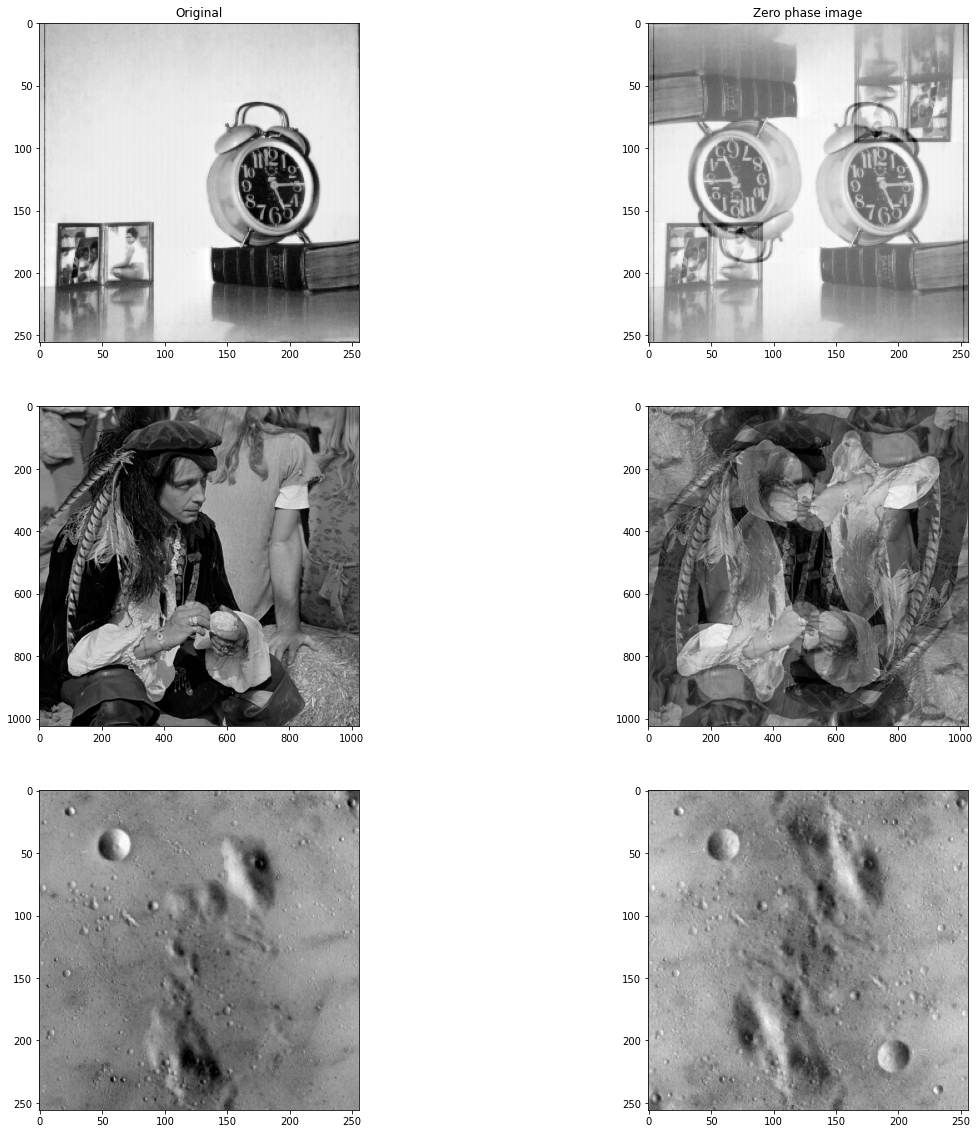

In [15]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(img_1, cmap='gray')
plt.subplot(3, 2, 2)
plt.title("Zero phase image")
plt.imshow(I_ph_zero_1, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(img_2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(I_ph_zero_2, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(img_3, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(I_ph_zero_3, cmap='gray')

#### (b) Adding noise

In [16]:
I_dft_mag_1 = np.absolute(I_dft_1)
I_dft_phase_1 = np.angle(I_dft_1)
I_dft_phase_noise_1 = np.random.normal(size=img_1.shape) + I_dft_phase_1

I_phase_noise_1 = idft_2(I_dft_mag_1 * np.exp(1j * I_dft_phase_noise_1)) 

In [17]:
I_dft_mag_2 = np.absolute(I_dft_2)
I_dft_phase_2 = np.angle(I_dft_2)
I_dft_phase_noise_2 = np.random.normal(size=img_2.shape) + I_dft_phase_2

I_phase_noise_2 = idft_2(I_dft_mag_2 * np.exp(1j * I_dft_phase_noise_2)) 

In [18]:
I_dft_mag_3 = np.absolute(I_dft_3)
I_dft_phase_3 = np.angle(I_dft_3)
I_dft_phase_noise_3 = np.random.normal(size=img_3.shape) + I_dft_phase_3

I_phase_noise_3 = idft_2(I_dft_mag_3 * np.exp(1j * I_dft_phase_noise_3)) 

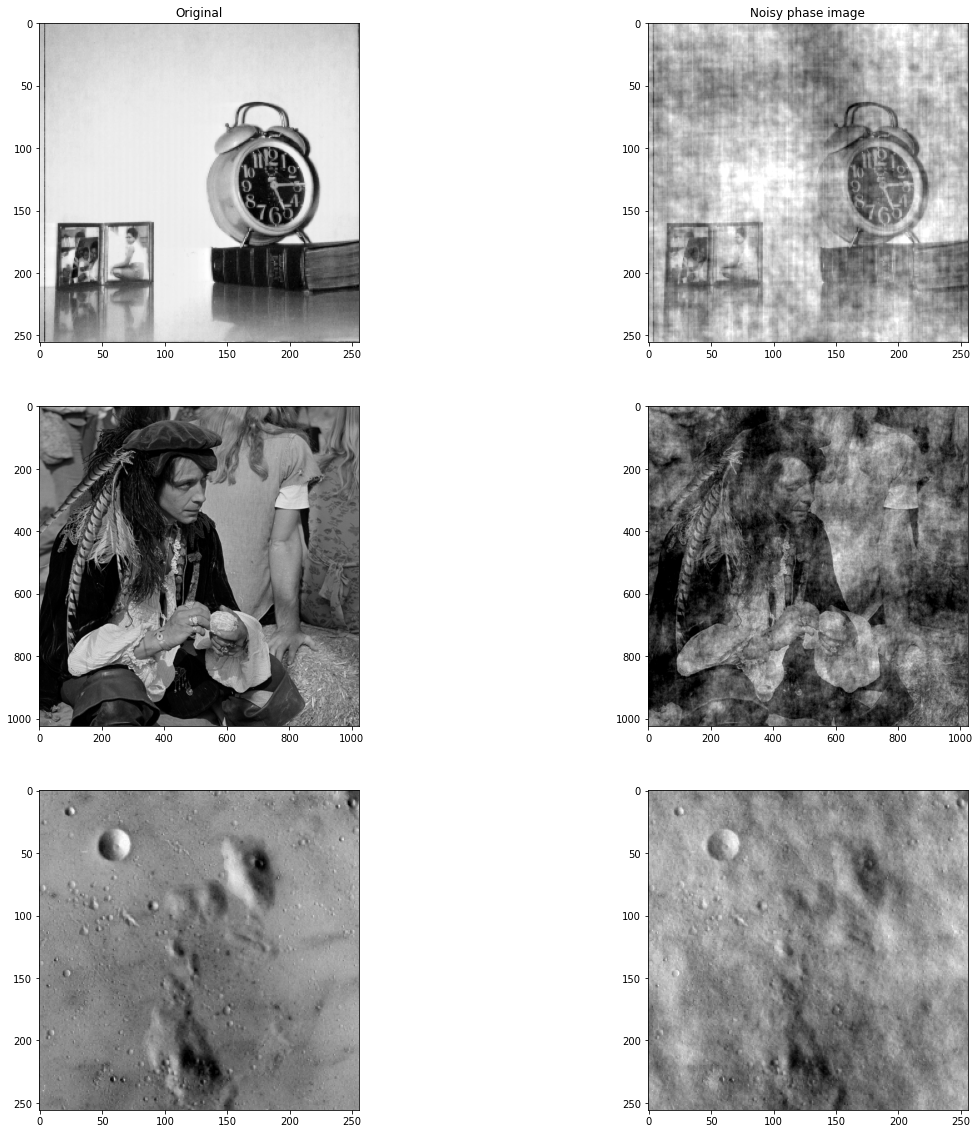

In [19]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(img_1, cmap='gray')
plt.subplot(3, 2, 2)
plt.title("Noisy phase image")
plt.imshow(I_phase_noise_1, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(img_2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(I_phase_noise_2, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(img_3, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(I_phase_noise_3, cmap='gray')

# Periodic Convolution

In [20]:
def circular_convolve(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    fr = np.flip(f)
    F = np.vstack((np.hstack((fr, fr)), np.hstack((fr, fr))))
    J = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            J[i, j] = np.sum(F[(M - 1 - i):(m + M - i-1), (N - 1 - j):(n + N - j-1)]*h)
    return J

In [21]:
%%time
average_filter = (1/25)*np.ones((5, 5))
I_avg_cconvolve_1 = circular_convolve(img_1, average_filter)
I_avg_cconvolve_2 = circular_convolve(img_2, average_filter)
I_avg_cconvolve_3 = circular_convolve(img_3, average_filter)

CPU times: user 10.5 s, sys: 0 ns, total: 10.5 s
Wall time: 10.5 s


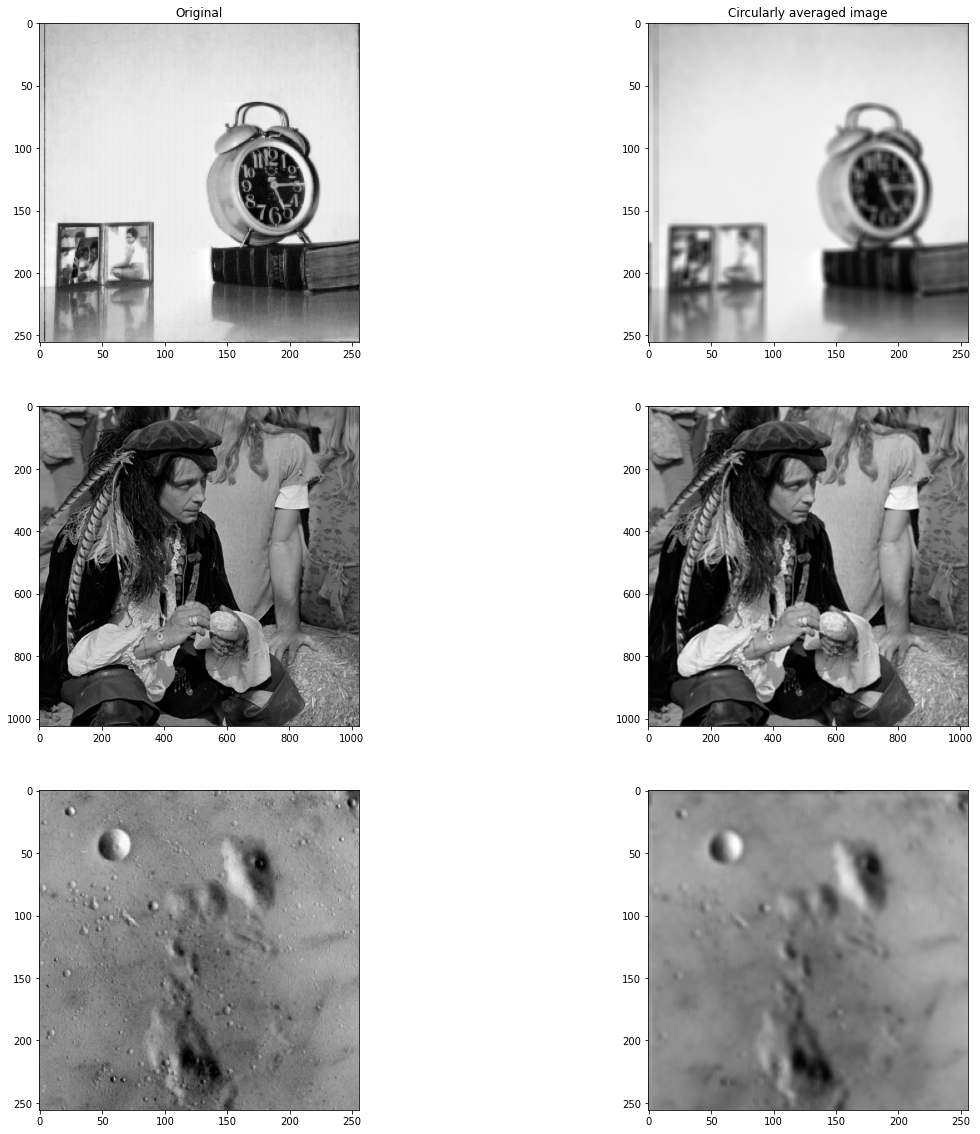

In [22]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(img_1, cmap='gray')
plt.subplot(3, 2, 2)
plt.title("Circularly averaged image")
plt.imshow(I_avg_cconvolve_1, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(img_2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(I_avg_cconvolve_2, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(img_3, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(I_avg_cconvolve_3, cmap='gray')

### Linear convolution with circular convolution

In [23]:
def linear_convolve(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    h_padded = np.vstack((np.hstack((h, np.zeros((m, 2*N - n)))), np.zeros((2*M-m, 2*N))))
    f_padded = np.vstack((np.hstack((f, np.zeros((M, N)))), np.zeros((M, 2*N))))
    return circular_convolve(f_padded, h_padded)[:M, :N]

#### The below cells are computationally expensive, so only one image is being displayed.

In [51]:
%%time
I_avg_lconvolve_1 = linear_convolve(img_1, average_filter)

CPU times: user 4min 9s, sys: 175 ms, total: 4min 10s
Wall time: 4min 10s


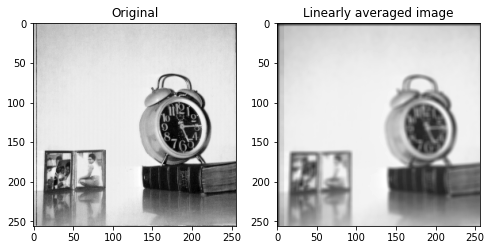

In [52]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Linearly averaged image")
plt.imshow(I_avg_lconvolve_1, cmap='gray')

### Linear convolution with DFT

In [28]:
def linear_convolve_dft(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    h_padded = np.vstack((np.hstack((h, np.zeros((m, 2*N - n)))), np.zeros((2*M-m, 2*N))))
    f_padded = np.vstack((np.hstack((f, np.zeros((M, N)))), np.zeros((M, 2*N))))
    return idft_2(dft_2(h_padded) * dft_2(f_padded))[:M, :N]

In [29]:
%%time
I_avg_lconvolve_dft_1 = linear_convolve_dft(img_1, average_filter)
I_avg_lconvolve_dft_2 = linear_convolve_dft(img_2, average_filter)
I_avg_lconvolve_dft_3 = linear_convolve_dft(img_3, average_filter)

<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


CPU times: user 59.2 s, sys: 15.3 s, total: 1min 14s
Wall time: 22.1 s


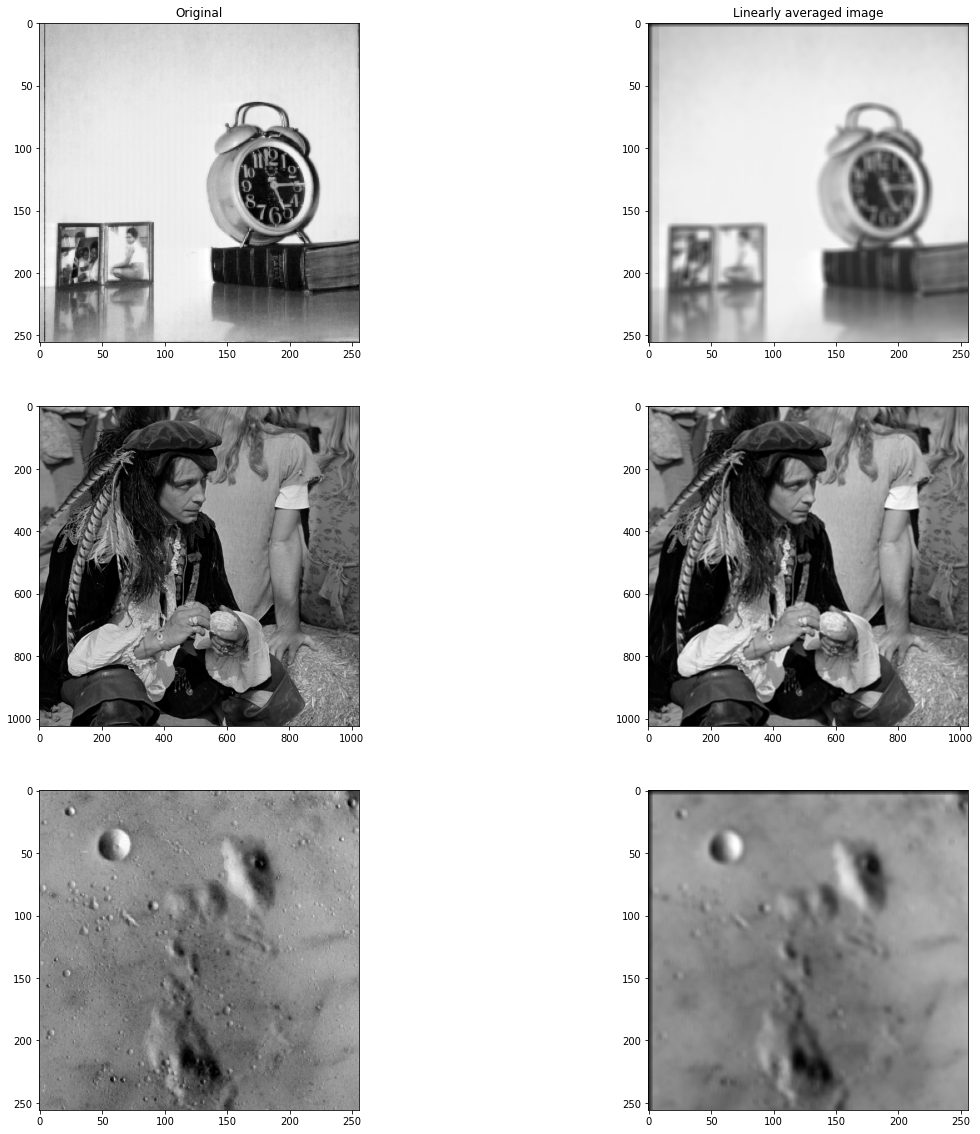

In [30]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(img_1, cmap='gray')
plt.subplot(3, 2, 2)
plt.title("Linearly averaged image")
plt.imshow(I_avg_lconvolve_dft_1, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(img_2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(I_avg_lconvolve_dft_2, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(img_3, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(I_avg_lconvolve_dft_3, cmap='gray')

In [31]:
if np.allclose(I_avg_lconvolve_1, I_avg_lconvolve_dft_1):
    print("Verification of linear convolution with DFT of clock image is successfull!!")
else:
    print("Verification of linear convolution  with DFT of clock image is failed!!")

Verification of linear convolution with DFT of clock image is successfull!!


# Image denoising using linear filters

In [32]:
mu = 0
var = 25

I_noise_1 = img_1 + np.sqrt(var)*np.random.randn(img_1.shape[0], img_1.shape[1]) + mu
I_noise_2 = img_2 + np.sqrt(var)*np.random.randn(img_2.shape[0], img_2.shape[1]) + mu
I_noise_3 = img_3 + np.sqrt(var)*np.random.randn(img_3.shape[0], img_3.shape[1]) + mu

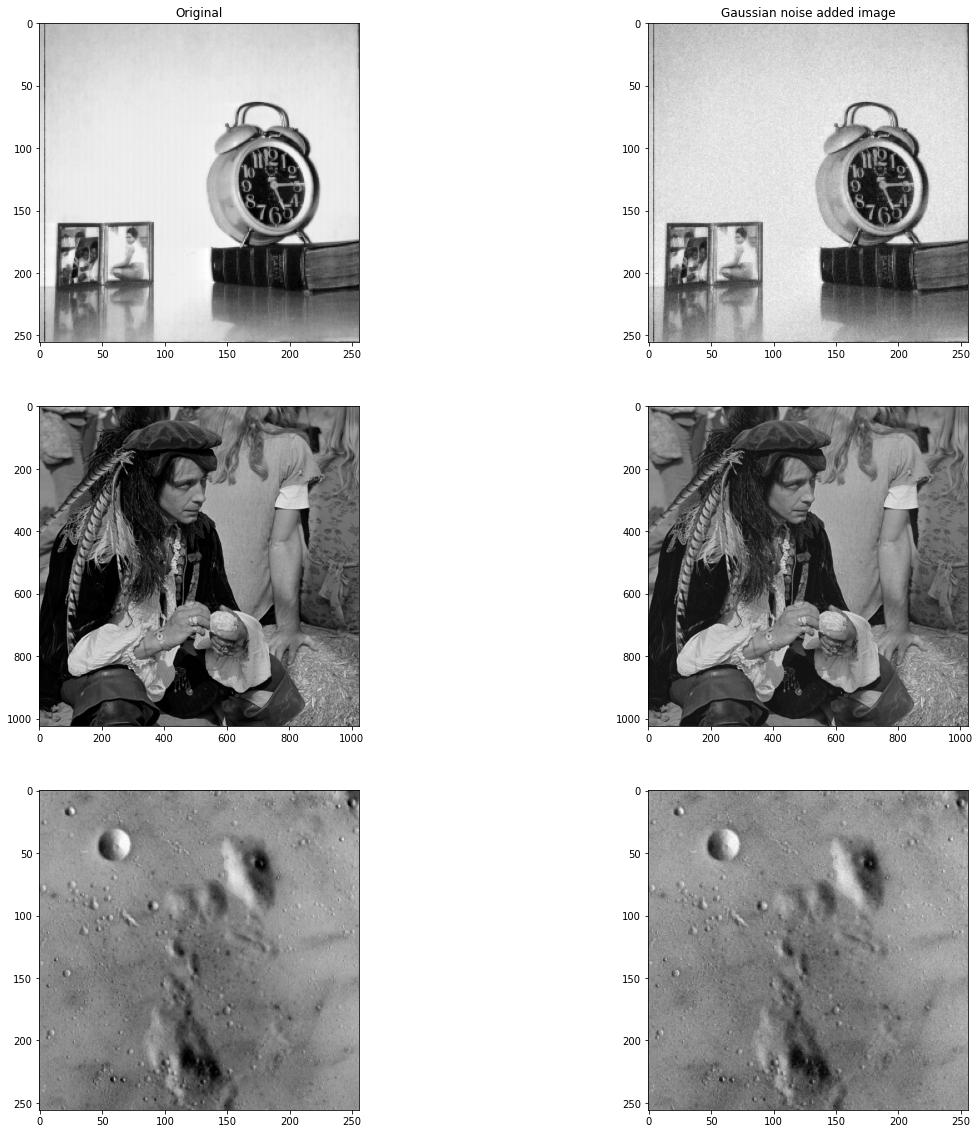

In [33]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(img_1, cmap='gray')
plt.subplot(3, 2, 2)
plt.title("Gaussian noise added image")
plt.imshow(I_noise_1, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(img_2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(I_noise_2, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(img_3, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(I_noise_3, cmap='gray')

## Question 1

In [36]:
def Average_filter(M):
    return (1/(M*M))*np.ones((M, M))

def rms_error(I_original, I_noisy):
    (M, N) = I_original.shape
    error = np.power(I_original - I_noisy, 2)
    return np.sqrt(np.sum(error)/(M*N))

Clock image noise filtering started!


<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


Clock image noise filtering is done!
Man image noise filtering started!
Man image noise filtering is done!
Moon image noise filtering started!
Moon image noise filtering is done!


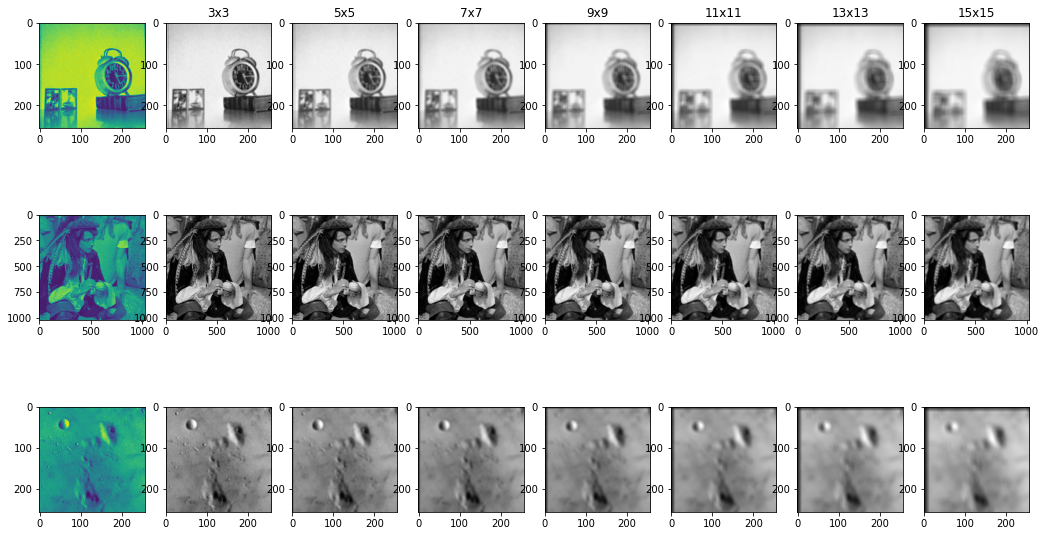

In [45]:
plt.rcParams["figure.figsize"] = (20,10)

print("Clock image noise filtering started!")
errors_1 = []
j = 1
plt.subplot(3, 9, 1)
plt.imshow(I_noise_1, cmap='gray')
for i in range(3, 17, 2):
    h = Average_filter(i)
    I_denoise = linear_convolve_dft(I_noise_1, h)
    errors_1.append(rms_error(img_1, I_denoise))
    plt.subplot(3, 9, j+1)
    plt.title("{}x{}".format(i, i))
    plt.imshow(I_denoise, cmap='gray')
    j+=1
print("Clock image noise filtering is done!")

print("Man image noise filtering started!")
errors_2 = []
j = 10
plt.subplot(3, 9, 10)
plt.imshow(I_noise_2, cmap='gray')
for i in range(3, 17, 2):
    h = Average_filter(i)
    I_denoise = linear_convolve_dft(I_noise_2, h)
    errors_2.append(rms_error(img_2, I_denoise))
    plt.subplot(3, 9, j+1)
    plt.imshow(I_denoise, cmap='gray')
    j+=1
print("Man image noise filtering is done!")

print("Moon image noise filtering started!")
errors_3 = []
j = 19
plt.subplot(3, 9, 19)
plt.imshow(I_noise_3, cmap='gray')
for i in range(3, 17, 2):
    h = Average_filter(i)
    I_denoise = linear_convolve_dft(I_noise_3, h)
    errors_3.append(rms_error(img_3, I_denoise))
    plt.subplot(3, 9, j+1)
    plt.imshow(I_denoise, cmap='gray')
    j+=1
print("Moon image noise filtering is done!")

Text(0, 0.5, 'RMS error')

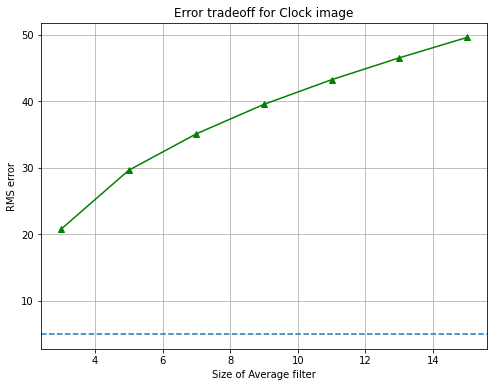

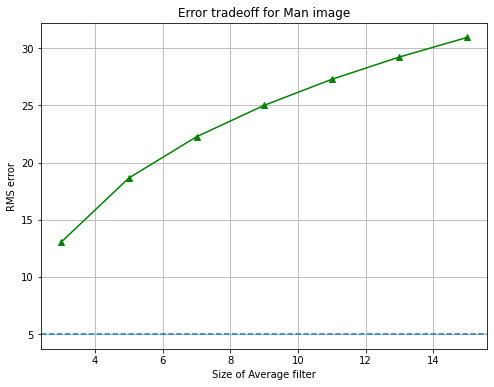

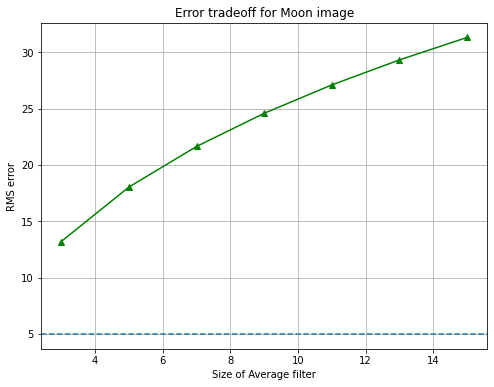

In [46]:
plt.rcParams["figure.figsize"] = (8,6)

plt.figure()
plt.title("Error tradeoff for Clock image")
plt.plot(np.arange(3, 17, 2), errors_1, "-^g")
plt.axhline(y=rms_error(img_1, I_noise_1), linestyle='--')
plt.grid()
plt.xlabel("Size of Average filter")
plt.ylabel("RMS error")

plt.figure()
plt.title("Error tradeoff for Man image")
plt.plot(np.arange(3, 17, 2), errors_2, "-^g")
plt.axhline(y=rms_error(img_2, I_noise_2), linestyle='--')
plt.grid()
plt.xlabel("Size of Average filter")
plt.ylabel("RMS error")

plt.figure()
plt.title("Error tradeoff for Moon image")
plt.plot(np.arange(3, 17, 2), errors_3, "-^g")
plt.axhline(y=rms_error(img_3, I_noise_3), linestyle='--')
plt.grid()
plt.xlabel("Size of Average filter")
plt.ylabel("RMS error")

## Question 2

In [43]:
def gaussian_filter(sigma, N):
    H = np.zeros((N, N))

    mid = N//2
    for i in range(N):
        for j in range(N):
            if(i <= mid):
                if(j <= mid):
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*(i**2 + j**2)/(N**2))
                else:
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*(i**2 + (N-1-j)**2)/(N**2))
            else:
                if(j <= mid):
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*((N-1-i)**2 + j**2)/(N**2))
                else:
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*((N-1-i)**2 + (N-1-j)**2)/(N**2))
    return H

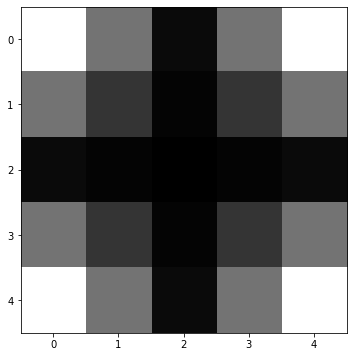

In [53]:
## Gaussian Filter
plt.imshow(gaussian_filter(1, 5), cmap='gray')

Clock image gaussian noise filtering started!


<ipython-input-4-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


Clock image gaussian noise filtering is done!
Man image gaussian noise filtering started!
Man image gaussian noise filtering is done!
Moon image gaussian noise filtering started!
Moon image gaussian noise filtering is done!


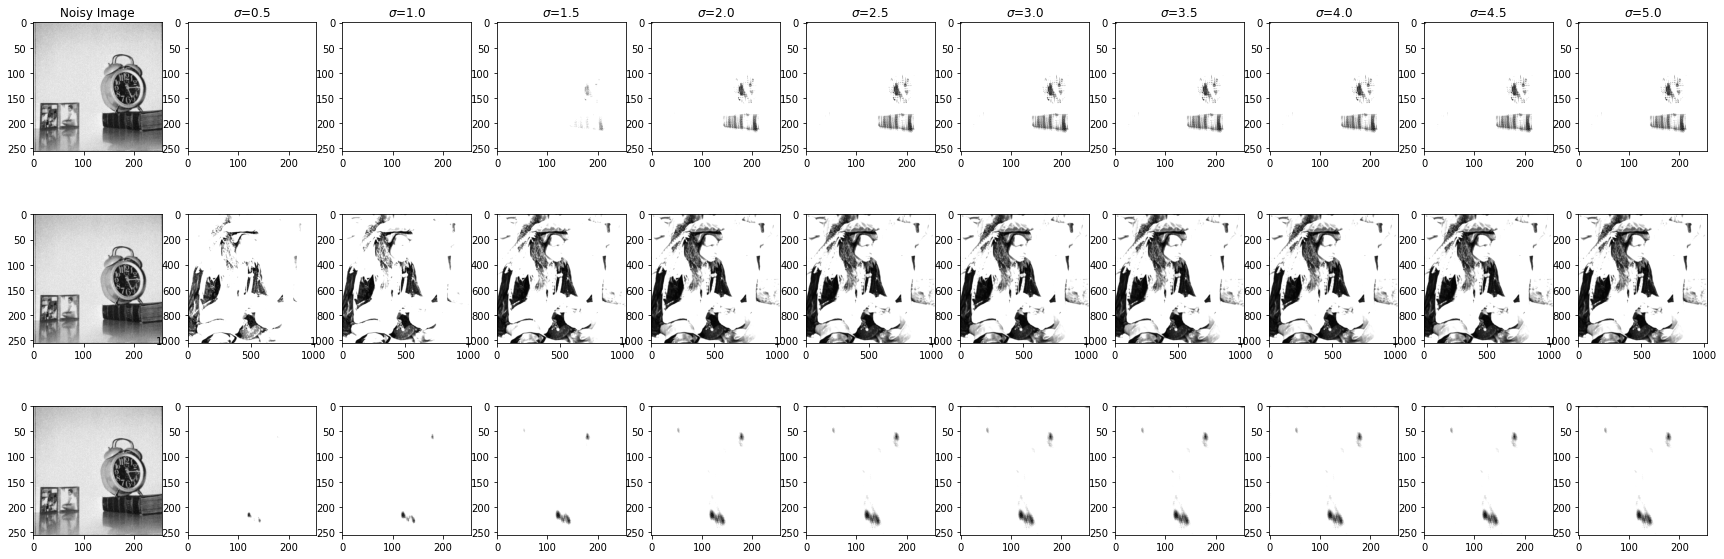

In [54]:
plt.rcParams["figure.figsize"] = (30,10)

errors_gau_1 = []
Sigma = np.arange(0.5, 5.5, 0.5)

print("Clock image gaussian noise filtering started!")
plt.subplot(3, 11, 1)
plt.title("Noisy Image")
plt.imshow(I_noise_1, cmap='gray')
j = 2
for i in Sigma:
    h = gaussian_filter(i, 5)
    I_denoise = linear_convolve_dft(I_noise_1, h)
    errors_gau_1.append(rms_error(img_1, I_denoise))
    plt.subplot(3, 11, j)
    plt.title(r'$\sigma$={}'.format(i))
    plt.imshow(I_denoise, cmap='gray')
    j+=1
print("Clock image gaussian noise filtering is done!")

print("Man image gaussian noise filtering started!")
errors_gau_2 = []
plt.subplot(3, 11, 12)
plt.imshow(I_noise_1, cmap='gray')
j = 13
for i in Sigma:
    h = gaussian_filter(i, 5)
    I_denoise = linear_convolve_dft(I_noise_2, h)
    errors_gau_2.append(rms_error(img_2, I_denoise))
    plt.subplot(3, 11, j)
    plt.imshow(I_denoise, cmap='gray')
    j+=1
print("Man image gaussian noise filtering is done!")

print("Moon image gaussian noise filtering started!")
errors_gau_3 = []
plt.subplot(3, 11, 23)
plt.imshow(I_noise_1, cmap='gray')
j = 24
for i in Sigma:
    h = gaussian_filter(i, 5)
    I_denoise = linear_convolve_dft(I_noise_3, h)
    errors_gau_3.append(rms_error(img_3, I_denoise))
    plt.subplot(3, 11, j)
    plt.imshow(I_denoise, cmap='gray')
    j+=1
print("Moon image gaussian noise filtering is done!")

Text(0, 0.5, 'RMS error')

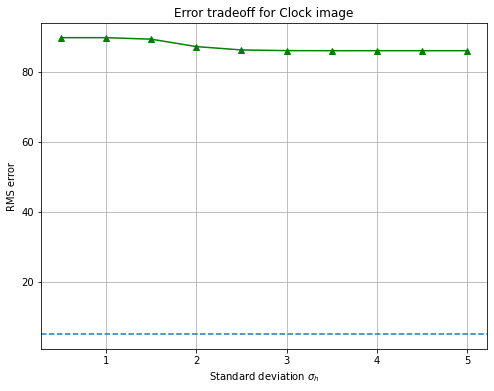

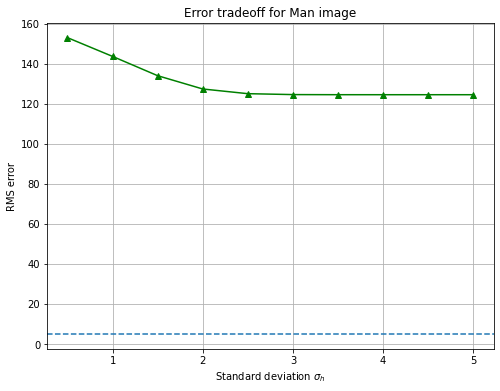

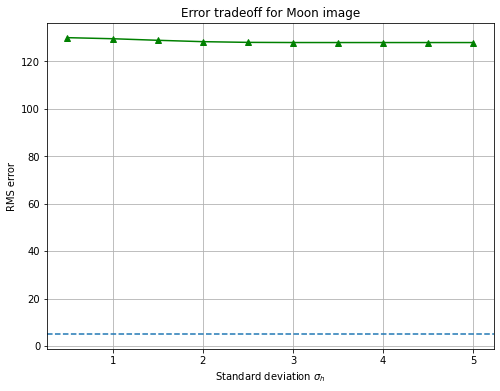

In [50]:
plt.rcParams["figure.figsize"] = (8,6)

plt.figure()
plt.title("Error tradeoff for Clock image")
plt.plot(Sigma, errors_gau_1, "-^g")
plt.axhline(y=rms_error(img_1, I_noise_1), linestyle='--')
plt.grid()
plt.xlabel(r"Standard deviation ${\sigma}_h$")
plt.ylabel("RMS error")
plt.figure()
plt.title("Error tradeoff for Man image")
plt.plot(Sigma, errors_gau_2, "-^g")
plt.axhline(y=rms_error(img_2, I_noise_2), linestyle='--')
plt.grid()
plt.xlabel(r"Standard deviation ${\sigma}_h$")
plt.ylabel("RMS error")

plt.figure()
plt.title("Error tradeoff for Moon image")
plt.plot(Sigma, errors_gau_3, "-^g")
plt.axhline(y=rms_error(img_3, I_noise_3), linestyle='--')
plt.grid()
plt.xlabel(r"Standard deviation ${\sigma}_h$")
plt.ylabel("RMS error")

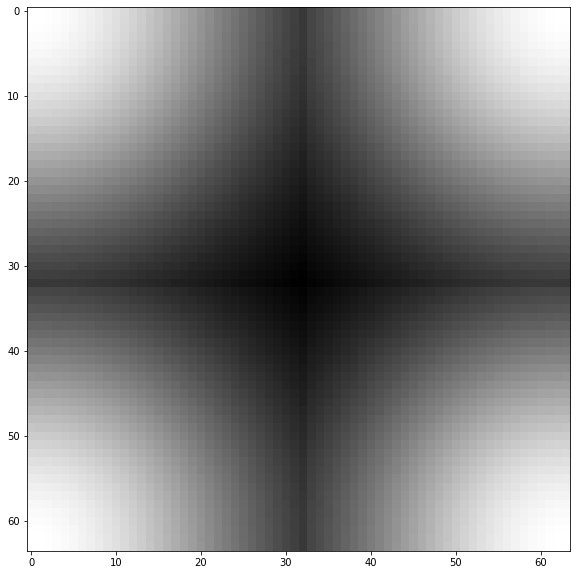

In [74]:
import cv2
plt.imshow(gaussian_filter(0.5, 64), cmap='gray')
plt.imsave("custom.tiff", gaussian_filter(0.5, 64), cmap='gray')